In [1]:
def numerical_diff(f, x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

print('x = 5에서 수치 미분 결과:', numerical_diff(function_1, 5))
print('x = 10에서 수치 미분 결과:', numerical_diff(function_1, 10))

x = 5에서 수치 미분 결과: 0.1999999999990898
x = 10에서 수치 미분 결과: 0.2999999999986347


In [2]:
def partial_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

def function_1(x0):
    x1 = 4
    return 3*(x0**4) + 2*(x0**2)*(x1**2) + 7*(x1**4)

print('x0=3, x1=4에서의 x0에 대한 편비문 결과 : ', partial_diff(function_1, 3))


x0=3, x1=4에서의 x0에 대한 편비문 결과 :  516.0000003616005


In [3]:
def partial_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

def function_2(x1):
    x0 = 3
    return 3*(x0**4) + 2*(x0**2)*(x1**2) + 7*(x1**4)

print('x0=3, x1=4에서의 x0에 대한 편비문 결과 : ', partial_diff(function_2, 4))

x0=3, x1=4에서의 x0에 대한 편비문 결과 :  1936.0000011192824


In [4]:
import numpy as np
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

def function_2(x):
    return 3*(x[0]**4) + 2*(x[0]**2)*(x[1]**2) + 7*(x[1]**4)

print('x0=3, x1=4에서의 x0에 대한 편비문 결과 : ', numerical_gradient(function_2, np.array([3.0, 4.0])))

x0=3, x1=4에서의 x0에 대한 편비문 결과 :  [ 516.00000036 1936.00000112]


In [5]:
#coding: utf-8
import numpy as np
import matplotlib.pylab as plt

def gradient_descent(f, init_w, learning_rate, step_num):
    w = init_w

    for i in range(step_num):
        grad = numerical_gradient(f, w)
        w -= learning_rate * grad

    return w

def function_2(x):
    return 3*(x[0]**4) + 2*(x[0]**2)*(x[1]**2) + 7*(x[1]**4)

print('Learning rate가 10.0일 때 경사하강법을 적용한 최종 W 위치 : ',
     gradient_descent(function_2, np.array([-3.0, 4.0]), 10.0, 100))
print('Learning rate가 0.001일 때 경사하강법을 적용한 최종 W 위치 : ',
     gradient_descent(function_2, np.array([-3.0, 4.0]), 0.001, 100))
print('Learning rate가 0.00000001일 때 경사하강법을 적용한 최종 W 위치 : ',
     gradient_descent(function_2, np.array([-3.0, 4.0]), 1e-8, 100))

Learning rate가 10.0일 때 경사하강법을 적용한 최종 W 위치 :  [-9.37416128e+13  2.05109945e+15]
Learning rate가 0.001일 때 경사하강법을 적용한 최종 W 위치 :  [-0.58538933  0.35407636]
Learning rate가 0.00000001일 때 경사하강법을 적용한 최종 W 위치 :  [-2.99948419  3.99806535]


In [6]:
import numpy as np
def mean_squared_error(y, t):
    return np.sum((y-t)**2)/len(y)

t = [0,0,1,0,0,0,0,0,0,0]
y1 = [0.1, 0.0, 0.6, 0.0, 0.05, 0.1, 0.05, 0.1, 0.0, 0.0]
y2 = [0.1, 0.1, 0.05, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print('예측이 y1일 때 MSE :', round(mean_squared_error(np.array(y1), np.array(t)), 4))
print('예측이 y1일 때 MSE :', round(mean_squared_error(np.array(y2), np.array(t)), 4))

예측이 y1일 때 MSE : 0.0195
예측이 y1일 때 MSE : 0.1295


In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0,0,1,0,0,0,0,0,0,0]
y1 = [0.1, 0.0, 0.6, 0.0, 0.05, 0.1, 0.05, 0.1, 0.0, 0.0]
y2 = [0.1, 0.1, 0.05, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print('예측이 y1일 때 MSE :', round(cross_entropy_error(np.array(y1), np.array(t)), 4))
print('예측이 y1일 때 MSE :', round(cross_entropy_error(np.array(y2), np.array(t)), 4))

예측이 y1일 때 MSE : 0.5108
예측이 y1일 때 MSE : 2.9957


In [8]:
def cross_entropy_error(y ,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

In [9]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print('x_train 형상 :', x_train.shape)
print('t_train 형상 :', t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('train data 크기에서 Mini-Batch 수만큼 랜덤하게 추출한 값 : ', batch_mask, sep='\n')
print('Mini-Batch 처리된 x_train :', x_batch, sep='\n')
print('Mini-Batch 처리된 t_train :', t_batch, sep='\n')

x_train 형상 : (60000, 784)
t_train 형상 : (60000, 10)
train data 크기에서 Mini-Batch 수만큼 랜덤하게 추출한 값 : 
[59301 53186 57438 26842 48501 22214 34820 39193  8500 21122]
Mini-Batch 처리된 x_train :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Mini-Batch 처리된 t_train :
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout*(1.0 - self.out) * self.out
        return dx

In [11]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

In [12]:
def softmax(x):
        x = x - np.max(x, axis=-1, keepdims=True)
        return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t =t.reshape(1, t.size)
        y =y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

In [13]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b

        self.x = None
        self.original_x_shape = None

        self.dW = None
        self.db = None

    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)

        dx = dx.reshape(*self.original_x_shape)
        return dx

In [16]:
class ThreeLayerNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid2'] = Sigmoid()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        return grads

    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads


In [18]:
import numpy as np
from dataset.mnist import load_mnist
from collections import OrderedDict

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = ThreeLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

iters_num = 50000
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.1

train_loss_list = []
train_loss_list2 = []
train_acc_list = []
test_acc_list = []
epoch = 0

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        epoch += 1
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        train_loss_list2.append(loss)
        print('Epoch :', epoch, '=> train 정확도 :', round(train_acc*100, 2),
              '% / test 정확도 :', round(test_acc*100, 2),
              '% / loss :', round(loss, 4))

print('종료')

Epoch : 1 => train 정확도 : 11.24 % / test 정확도 : 11.35 % / loss : 2.27
Epoch : 2 => train 정확도 : 9.86 % / test 정확도 : 9.58 % / loss : 2.2723
Epoch : 3 => train 정확도 : 11.27 % / test 정확도 : 11.38 % / loss : 2.2809
Epoch : 4 => train 정확도 : 21.14 % / test 정확도 : 21.47 % / loss : 2.0736
Epoch : 5 => train 정확도 : 38.25 % / test 정확도 : 38.61 % / loss : 1.7426
Epoch : 6 => train 정확도 : 64.39 % / test 정확도 : 64.93 % / loss : 1.1161
Epoch : 7 => train 정확도 : 81.81 % / test 정확도 : 81.99 % / loss : 0.6773
Epoch : 8 => train 정확도 : 87.02 % / test 정확도 : 87.55 % / loss : 0.3342
Epoch : 9 => train 정확도 : 89.66 % / test 정확도 : 89.82 % / loss : 0.4683
Epoch : 10 => train 정확도 : 91.41 % / test 정확도 : 91.26 % / loss : 0.1875
Epoch : 11 => train 정확도 : 92.62 % / test 정확도 : 92.59 % / loss : 0.1748
Epoch : 12 => train 정확도 : 93.4 % / test 정확도 : 93.39 % / loss : 0.1486
Epoch : 13 => train 정확도 : 94.2 % / test 정확도 : 94.16 % / loss : 0.1526
Epoch : 14 => train 정확도 : 94.62 % / test 정확도 : 94.32 % / loss : 0.1145
Epoch : 15 => train 정

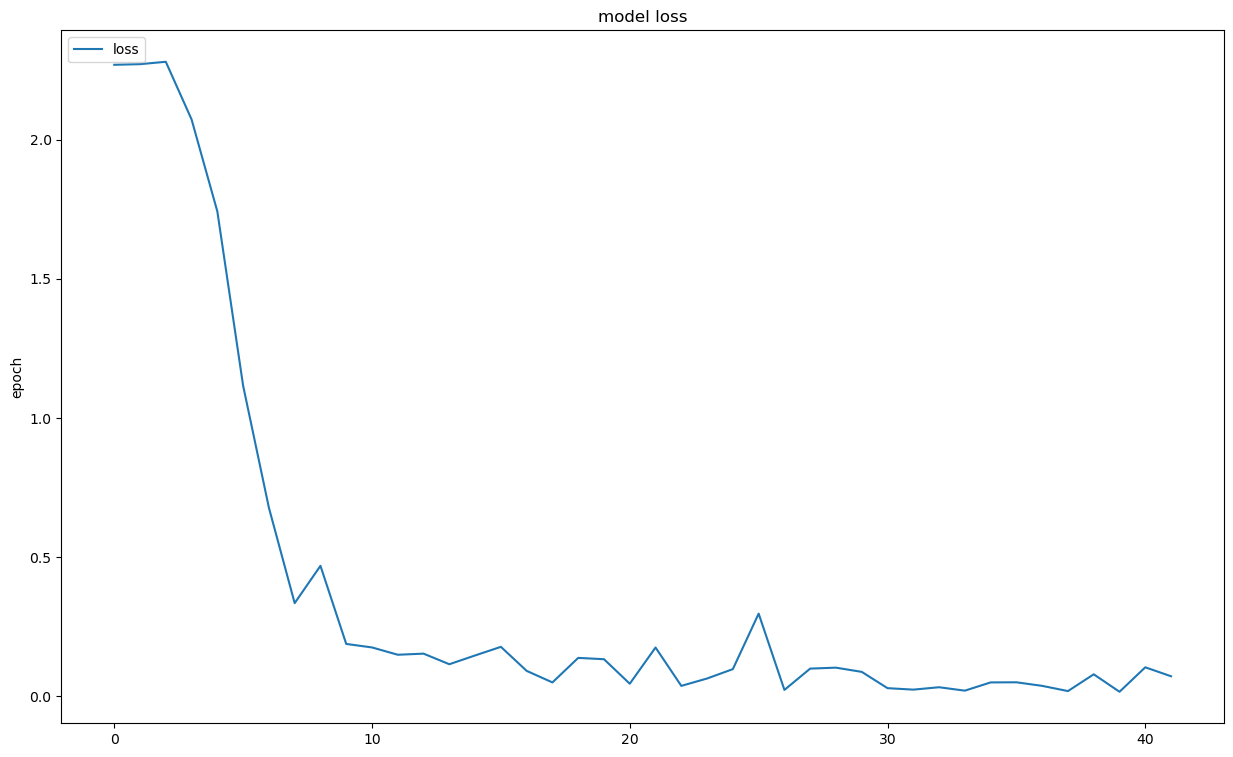

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
plt. plot(train_loss_list2)
plt.title('model loss')
plt.ylabel('loss')
plt.ylabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

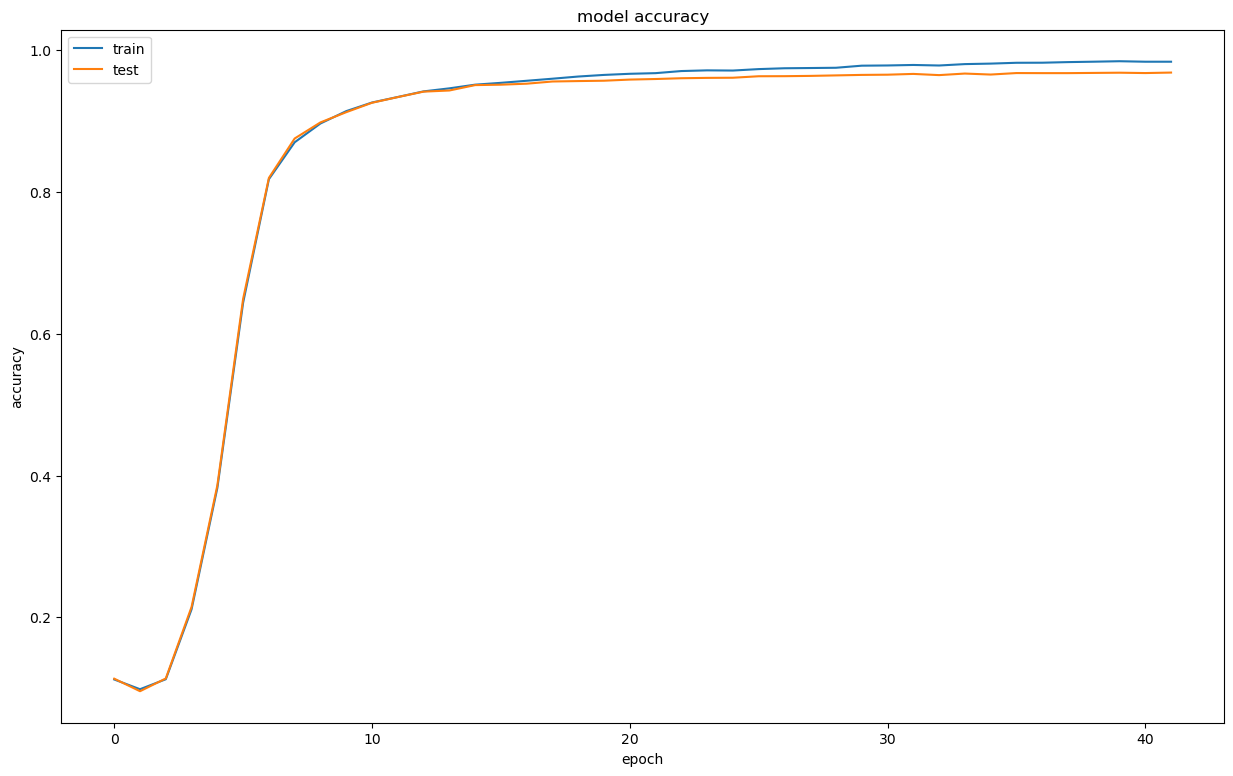

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()